In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("honeypot_class_modified.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3880 entries, 0 to 3879
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   No.          3880 non-null   int64  
 1   Time         3880 non-null   float64
 2   Destination  3880 non-null   object 
 3   Protocol     3880 non-null   object 
 4   Length       3880 non-null   int64  
 5   Info         3880 non-null   object 
 6   attack       3880 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 185.8+ KB


In [4]:
# Drop the 'No.' column
data = data.drop(columns=['No.'])

In [5]:
data.head(5)

,Time,Destination,Protocol,Length,Info,attack
0,0.000000,193.0.14.129,DNS,70,Standard query 0xdc87 NS <Root> OPT,False
1,0.000010,192.5.5.241,DNS,70,Standard query 0xd267 NS <Root> OPT,False
2,0.000014,192.58.128.30,DNS,70,Standard query 0xedce NS <Root> OPT,True
3,0.116002,200.19.107.238,DNS,75,Standard query 0x0824 A etihadguest.com,False
4,0.117770,200.19.107.238,DNS,73,Standard query 0x4567 ANY sl OPT,False


In [6]:
missing_values = data.isnull().sum() #check missing values in every columns
print(missing_values)

Time           0
Destination    0
Protocol       0
Length         0
Info           0
attack         0
dtype: int64


In [7]:
for c in data.columns:
    if data[c].dtype == 'object':                   
        data[c].fillna(data[c].mode()[0], inplace=True)
    elif data[c].dtype in ['int64', 'float64']:    
        data[c].fillna(data[c].median(), inplace=True)
data.isnull().sum()

Time           0
Destination    0
Protocol       0
Length         0
Info           0
attack         0
dtype: int64

<h4> Data Preprocessing </h4>

In [8]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Handle categorical and numerical features
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Label encode categorical features
label_encoders = {}
for feature in categorical_features:
    l = LabelEncoder()
    data[feature] = l.fit_transform(data[feature].astype(str))  # Convert to str if any issues arise
    label_encoders[feature] = l

# Scale numerical features
scaler = StandardScaler()
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data.head(5)

,Time,Destination,Protocol,Length,Info,attack
0,-1.182977,88,2,-0.339484,910,False
1,-1.182977,82,2,-0.339484,852,False
2,-1.182977,87,2,-0.339484,960,True
3,-1.182877,133,2,-0.319923,113,False
4,-1.182876,133,2,-0.327747,342,False


In [9]:
from sklearn.model_selection import train_test_split
X = data.drop('attack', axis=1)
y = data['attack']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)    

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (3104, 5)
X_test shape: (776, 5)
y_train shape: (3104,)
y_test shape: (776,)


In [10]:

if 'Protocol' in categorical_features:
    # Get the protocol encoder
    protocol_encoder = label_encoders['Protocol']

    # Step 2: Display the mapping of original protocol values to encoded values
    protocol_mapping = dict(zip(protocol_encoder.classes_, protocol_encoder.transform(protocol_encoder.classes_)))
    print("Protocol encoding:", protocol_mapping)
else:
    print("The 'protocol' feature is not in categorical_features. Please check the data type of the 'protocol' column.")


Protocol encoding: {'CLDAP': 0, 'Chargen': 1, 'DNS': 2, 'IPv4': 3, 'MEMCACHE': 4, 'NTP': 5, 'TCP': 6, 'UDP': 7}


In [11]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)                                                              
accuracy = accuracy_score(y_test, y_pred)                       
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 0.9072164948453608
              precision    recall  f1-score   support

       False       0.80      0.77      0.79       172
        True       0.94      0.95      0.94       604

    accuracy                           0.91       776
   macro avg       0.87      0.86      0.86       776
weighted avg       0.91      0.91      0.91       776



In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Function to train a model and print the classification report
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))
    print("-" * 50)

# KNN
knn = KNeighborsClassifier()
evaluate_model(knn, X_train, y_train, X_test, y_test)

# SVM
svm = SVC(random_state=42)
evaluate_model(svm, X_train, y_train, X_test, y_test)

# Logistic Regression
logistic = LogisticRegression(random_state=42, max_iter=1000)
evaluate_model(logistic, X_train, y_train, X_test, y_test)

# Decision Tree
decision_tree = DecisionTreeClassifier(random_state=42)
evaluate_model(decision_tree, X_train, y_train, X_test, y_test)


Model: KNeighborsClassifier
Accuracy: 0.7659
              precision    recall  f1-score   support

       False       0.36      0.17      0.23       192
        True       0.81      0.92      0.86       735

    accuracy                           0.77       927
   macro avg       0.58      0.54      0.54       927
weighted avg       0.72      0.77      0.73       927

--------------------------------------------------
Model: SVC
Accuracy: 0.7929
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       192
        True       0.79      1.00      0.88       735

    accuracy                           0.79       927
   macro avg       0.40      0.50      0.44       927
weighted avg       0.63      0.79      0.70       927

--------------------------------------------------
Model: LogisticRegression
Accuracy: 0.7929
              precision    recall  f1-score   support

       False       0.00      0.00      0.00       192
        True       

c:\Users\rajpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rajpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\rajpa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [12]:
import lime
import lime.lime_tabular

In [13]:
# # Initialize the LimeTabularExplainer
# explainer = lime.lime_tabular.LimeTabularExplainer(
#     training_data=np.array(X_train),
#     feature_names=X_train.columns,
#     class_names=['No Attack', 'Attack'],  # Adjust class names based on your target variable
#     mode='classification'
# )

# # Loop through all instances in X_test and generate explanations
# for idx in range(len(X_test)):
#     # Choose an instance to explain
#     instance = X_test.iloc[idx]  # You can convert to a numpy array if necessary
    
#     # Generate explanation
#     exp = explainer.explain_instance(
#         data_row=instance,
#         predict_fn=model.predict_proba  # For classification models
#     )
    
#     # Show explanation (or store it in a list or output file if needed)
#     exp.show_in_notebook(show_table=True, show_all=True)
    
#     # Optionally, you can print the instance number to keep track
#     print(f"Explanation for instance {idx} generated.\n")



In [14]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Load the data
data = pd.read_csv("honeypot_class_modified.csv")

# Convert Protocol to encoded integer format
protocol_mapping = {'CLDAP': 0, 'Chargen': 1, 'DNS': 2, 'IPv4': 3, 'MEMCACHE': 4, 'NTP': 5, 'TCP': 6, 'UDP': 7}
data['Protocol'] = data['Protocol'].map(protocol_mapping)

# Filter only attack events
if 'attack' in data.columns:
    attack_data = data[data['attack'] == True]
else:
    raise ValueError("The 'attack' column is not present in the data.")

# Ensure 'Time' is in numeric format
if attack_data['Time'].dtype == 'object':
    attack_data['Time'] = pd.to_numeric(attack_data['Time'], errors='coerce')
    attack_data = attack_data.dropna(subset=['Time'])

# Sort data by time and reset index
attack_data = attack_data.sort_values(by='Time').reset_index(drop=True)

# Target variable is the time of the next attack
attack_data['next_attack_time'] = attack_data['Time'].shift(-1)

# Drop rows with NaN in `next_attack_time`
attack_data = attack_data.dropna()

# Identify non-numeric columns in X (e.g., IP addresses or categorical data)
X = attack_data.drop(columns=['next_attack_time', 'Time', 'attack'])
non_numeric_cols = X.select_dtypes(include=['object']).columns

# Apply label encoding for non-numeric columns
for col in non_numeric_cols:
    X[col] = LabelEncoder().fit_transform(X[col])

# Define target variable for next attack time
y_time = attack_data['next_attack_time']

# Train the Random Forest model for `next_attack_time`
time_model = RandomForestRegressor(random_state=42)
time_model.fit(X, y_time)

# Define the protocol mapping filter for protocols <= 2.0
valid_protocols = [k for k, v in protocol_mapping.items() if v <= 2.0]

# Filter the protocol mapping
filtered_protocol_mapping = {k: v for k, v in protocol_mapping.items() if v <= 2.0}
reverse_filtered_protocol_mapping = {v: k for k, v in filtered_protocol_mapping.items()}

# Filter the dataset to include only valid protocols for training
filtered_attack_data = attack_data[attack_data['Protocol'].isin(filtered_protocol_mapping.values())]
filtered_y_protocol = filtered_attack_data['Protocol'].shift(-1).dropna()
filtered_X_protocol = filtered_attack_data.drop(columns=['next_attack_time', 'Time', 'attack']).iloc[:-1]

# Apply label encoding to any remaining non-numeric columns in filtered_X_protocol
for col in filtered_X_protocol.select_dtypes(include=['object']).columns:
    filtered_X_protocol[col] = LabelEncoder().fit_transform(filtered_X_protocol[col])

# Match lengths of filtered_X_protocol and filtered_y_protocol after shifting
filtered_X_protocol = filtered_X_protocol.iloc[:len(filtered_y_protocol)]

# Train the Random Forest model for valid protocol prediction
filtered_protocol_model = RandomForestRegressor(random_state=42)
filtered_protocol_model.fit(filtered_X_protocol, filtered_y_protocol)

# Prepare the last row of data to predict the next attack time and valid protocol
last_data = X.iloc[[-1]]
filtered_last_data = filtered_X_protocol.iloc[[-1]]

# Predict the next attack time
predicted_next_attack_time = time_model.predict(last_data)

# Predict the next protocol and ensure it maps to valid protocols
filtered_predicted_next_protocol = filtered_protocol_model.predict(filtered_last_data)
filtered_predicted_next_protocol = round(filtered_predicted_next_protocol[0])
filtered_predicted_protocol_name = reverse_filtered_protocol_mapping.get(filtered_predicted_next_protocol, "Unknown")

# Generate the next 10 attack times based on the predicted time delta
predicted_attack_times = [predicted_next_attack_time[0]]
for _ in range(9):
    predicted_attack_times.append(predicted_attack_times[-1] + (predicted_next_attack_time[0] - attack_data['Time'].iloc[-1]))

# Prepare the final DataFrame for predictions
predicted_df = pd.DataFrame({
    'Predicted Attack Time': predicted_attack_times,
    'Predicted Protocol': [filtered_predicted_protocol_name] * 10
})

# Display the results
print(f"Predicted next attack time: {predicted_next_attack_time[0]}")
print(f"Predicted protocol for the next attack (valid protocols <= 2.0): {filtered_predicted_protocol_name}")
print("\nNext 10 predicted attack times:")
print(predicted_df)


Predicted next attack time: 4038.5280788500054
Predicted protocol for the next attack (valid protocols <= 2.0): DNS

Next 10 predicted attack times:
   Predicted Attack Time Predicted Protocol
0            4038.528079                DNS
1            4038.539921                DNS
2            4038.551763                DNS
3            4038.563604                DNS
4            4038.575446                DNS
5            4038.587288                DNS
6            4038.599130                DNS
7            4038.610972                DNS
8            4038.622814                DNS
9            4038.634656                DNS


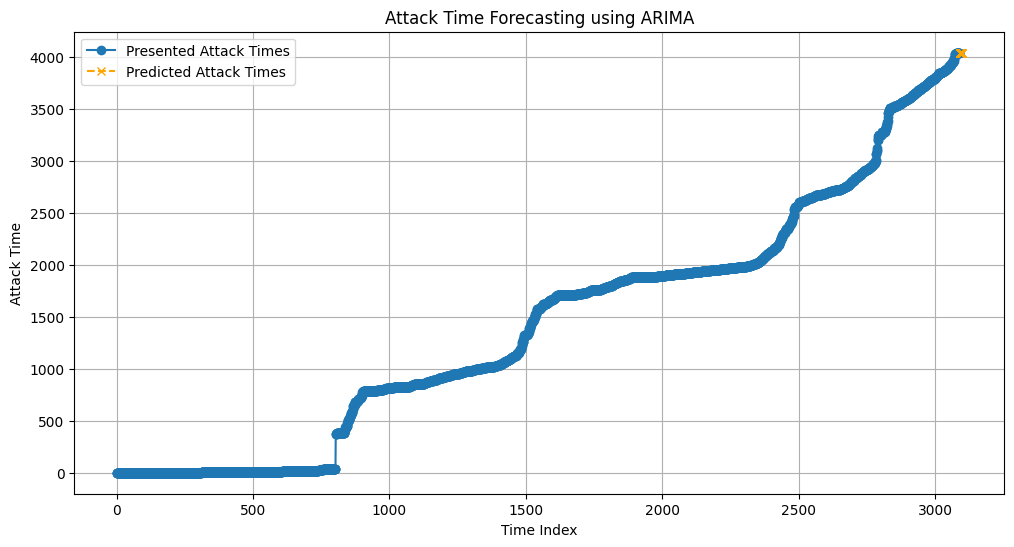

      Predicted Next Attack Time
3090                 4038.632678
3091                 4038.676563
3092                 4038.717269
3093                 4038.761017
3094                 4038.803011
3095                 4038.850499
3096                 4038.895372
3097                 4038.939186
3098                 4038.983039
3099                 4039.027249


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load the dataset
data = pd.read_csv("honeypot_class_modified.csv")

# Filter rows where attack is True
attack_data = data[data['attack'] == True]

# Ensure the 'Time' column is numeric
if attack_data['Time'].dtype == 'object':
    attack_data['Time'] = pd.to_numeric(attack_data['Time'], errors='coerce')
    attack_data = attack_data.dropna(subset=['Time'])

# Sort the data by 'Time'
attack_data = attack_data.sort_values(by='Time').reset_index(drop=True)

# Use only the 'Time' column for forecasting
time_series = attack_data['Time']

# Fit the ARIMA model (p, d, q values can be adjusted based on the dataset)
# Here, we use p=5, d=1, q=0 as a starting point for the ARIMA model
model = ARIMA(time_series, order=(5, 2, 0))  # ARIMA(p=5, d=1, q=0)
model_fit = model.fit()

# Forecast the next 100 attack times
forecast = model_fit.forecast(steps=10)

# Prepare the final DataFrame with the predicted times
predicted_df = pd.DataFrame({
    'Predicted Next Attack Time': forecast
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(attack_data['Time'], label='Presented Attack Times', marker='o')
plt.plot(range(len(attack_data), len(attack_data) + 10), forecast, label='Predicted Attack Times', linestyle='--', marker='x', color='orange')
plt.xlabel("Time Index")
plt.ylabel("Attack Time")
plt.title("Attack Time Forecasting using ARIMA")
plt.legend()
plt.grid()
plt.show()

# Output the predicted DataFrame
print(predicted_df)